In [183]:
import numpy as np
import matplotlib.pyplot as plt
import idx2numpy

In [184]:
# Importing and reshaping of training data
train_img_file = 'Train_Test_samples/train-images.idx3-ubyte'
train_label_file = 'Train_Test_samples/train-labels.idx1-ubyte'


train_img = idx2numpy.convert_from_file(train_img_file)
train_label = idx2numpy.convert_from_file(train_label_file)

# plt.imshow(train_img[0], cmap=plt.cm.binary)

# Reshape input data
num_samples = train_img.shape[0]
X_train = np.zeros((784,num_samples))

for i in range(num_samples):
    train_img_flat = train_img[i].flatten()
    X_train[:, i] = train_img_flat

# Reshape output data
Y_train = np.zeros((10,len(train_label)))
for num in range(len(train_label)):
    row = train_label[num]
    Y_train[row,num] = 1

# Importing and reshaping of test data
test_img_file = 'Train_Test_samples/t10k-images.idx3-ubyte'
test_label_file = 'Train_Test_samples/t10k-labels.idx1-ubyte'


test_img = idx2numpy.convert_from_file(test_img_file)
test_label = idx2numpy.convert_from_file(test_label_file)

# plt.imshow(test_img[0], cmap=plt.cm.binary)

# Reshape input data
num_samples_test = test_img.shape[0]
X_test = np.zeros((784,num_samples_test))

for i in range(num_samples_test):
    test_img_flat = test_img[i].flatten()
    X_test[:, i] = test_img_flat

# Reshape output data
Y_test = np.zeros((10,len(test_label)))
for num in range(len(test_label)):
    row = test_label[num]
    Y_test[row,num] = 1

In [185]:
# Parameter initialization
W1 = 0.025*np.random.randn(50,784) 
B1 = 0.025*np.random.randn(50,1) 
W2 = 0.025*np.random.randn(10,50)
B2 = 0.025*np.random.randn(10,1)

In [186]:
def relu(A):
    
    return np.maximum(0,A)

def softmax(A):
    
    softmax = np.exp(A)/np.sum(np.exp(A),axis=0)
    return softmax

In [187]:
def forward_prop(W1,B1,W2,B2,X):

    A1 = np.dot(W1,X) + B1
    Z1 = relu(A1)

    A2 = np.dot(W2,Z1) + B2
    Z2 = softmax(A2)
    
    return A1, Z1, A2, Z2

In [188]:
def CrossEntropyLoss(Y_pred,Y):
    m = Y.shape[1]
    loss = -np.log(Y_pred[Y.argmax(axis=0),range(m)])
    loss_total = np.sum(loss)/m
    
    accuracy = (np.sum(Y.argmax(axis=0) == Y_pred.argmax(axis=0))/m)*100
    
    return loss_total, accuracy


In [189]:
def backward_prop(W1, B1, W2, B2, A1, Z1, A2, Z2, X, Y):
    m = X.shape[1]

    # Compute the gradient of the loss with respect to the output layer
    dZ2 = Z2 - Y
    
    # Compute gradients of parameters in the output layer
    dW2 = (1 / m) * np.dot(dZ2, Z1.T)
    dB2 = (1 / m) * np.sum(dZ2)

    # Backpropagate through ReLU activation
    dA1 = np.dot(W2.T, dZ2) * (A1 > 0)

    # Compute gradients of parameters in the hidden layer
    dW1 = (1 / m) * np.dot(dA1, X.T)
    dB1 = (1 / m) * np.sum(dA1)

    return dW1, dB1, dW2, dB2

In [190]:
def train(X_train, Y_train, W1, B1, W2, B2, alpha, iteration):
    
    losses = []
    accuracies = []
    for i in range(iteration):
        
        # Forward propagation
        A1, Z1, A2, Z2 = forward_prop(W1, B1, W2, B2, X_train)

        # Compute loss
        loss_iter, accuracy = CrossEntropyLoss(Z2, Y_train)
        losses.append(loss_iter)
        accuracies.append(accuracy)
        # Backpropagation
        dW1, dB1, dW2, dB2 = backward_prop(W1, B1, W2, B2, A1, Z1, A2, Z2, X_train, Y_train)
        
        # Update parameters
        W1 -= alpha * dW1
        B1 -= alpha * dB1
        W2 -= alpha * dW2
        B2 -= alpha * dB2
        
        # display(f'Iteration {i+1}- Loss={loss_iter: .2f}, Accuracy={accuracy: .2f}')
    return W1, B1, W2, B2, losses, accuracies

In [191]:
alpha = 0.001
iters = 500
W1_trained, B1_trained, W2_trained, B2_trained, loss, accuracy = train(X_train, Y_train, W1, B1, W2, B2, alpha, iters)

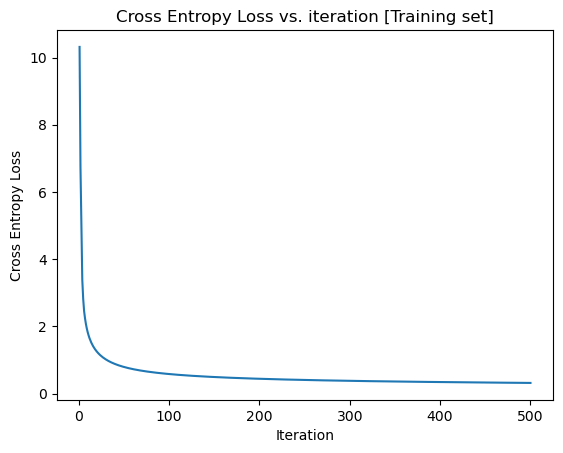

In [192]:
iteration = np.arange(1,iters+1,1)
# Plot of cross entropy loss vs. iterations on the training set
plt.plot(iteration,loss)
plt.title('Cross Entropy Loss vs. iteration [Training set]')
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration')
plt.show()

In [195]:
# Loss and accuracy of trained model on test set
A1, Z1, A2, Z2 = forward_prop(W1_trained, B1_trained, W2_trained, B2_trained, X_test)
loss_test, accuracy_test = CrossEntropyLoss(Z2, Y_test)


In [196]:
print(f'Loss and accuracy of trained model on test set: Loss={loss_test:.2f}, Accuracy={accuracy_test:.2f}')

Loss and accuracy of trained model on test set: Loss=0.32, Accuracy=90.81


The prediction is: 7
The real label is: 7


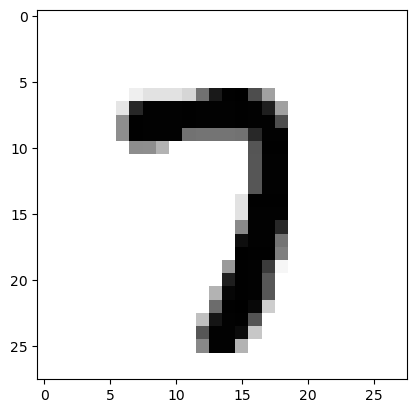

In [238]:
# Random prediction from test set
index = np.random.randint(0, 10000)
A1, Z1, A2, Prediction = forward_prop(W1_trained, B1_trained, W2_trained, B2_trained, X_test[:,index].reshape(-1,1))
print(f'The prediction is: {Prediction.argmax()}')
print(f'The real label is: {Y_test[:,index].argmax()}')
plt.imshow(X_test[:,index].reshape(28,28), cmap=plt.cm.binary)